In [10]:
# warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)


### 5.1 분류용 예제데이터

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

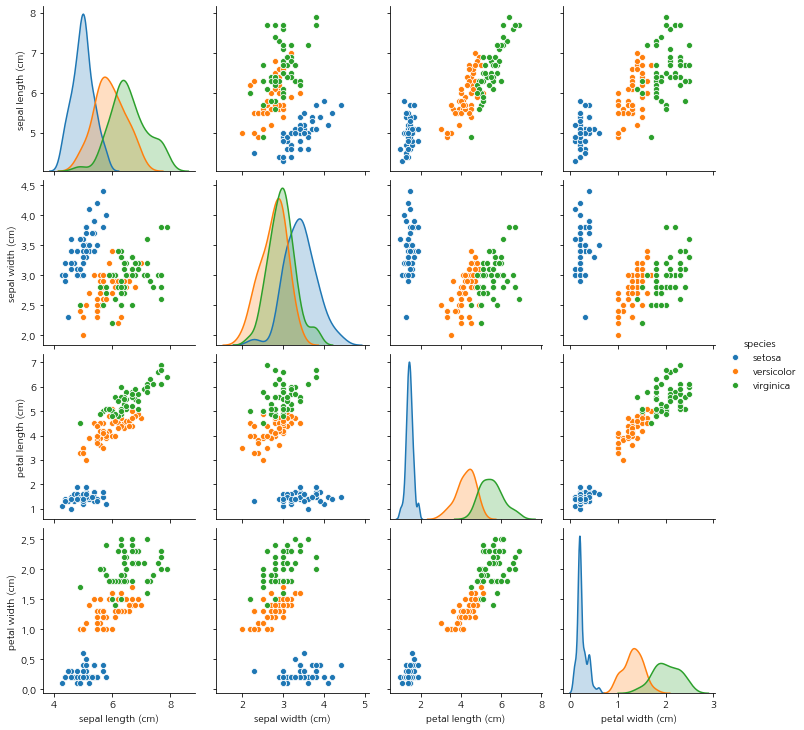

In [6]:
sns.pairplot(df, hue="species")
plt.show()

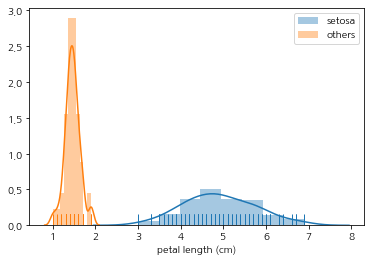

In [7]:
# setosa와 아닌것으로 분류
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

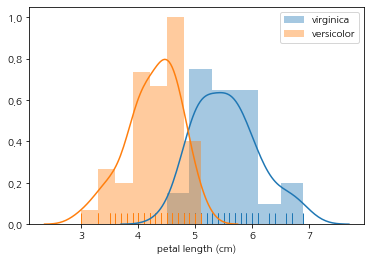

In [8]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [11]:
# 연습문제 2
# (1) 가장 적합한 꽃잎 길이의 기준값(thresh)을 생각하고 
# 이 값을 이용하여 베르시칼라와 버지니카를 분류하라.
df["prediction"]=0
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,prediction
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [25]:
df["species2"]=0
df.species2[df["species"]=="versicolor"]=1
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species2
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [61]:
for num in np.linspace(4,6,21):
    df["predict"]=0
    df.predict[df["petal length (cm)"]<num]=1
    print("petal length (cm)값 :{}".format(num),sum(df.predict==df.species2),"개 일치")
    num+=0.1

petal length (cm)값 :4.0 61 개 일치
petal length (cm)값 :4.1 66 개 일치
petal length (cm)값 :4.2 69 개 일치
petal length (cm)값 :4.3 73 개 일치
petal length (cm)값 :4.4 75 개 일치
petal length (cm)값 :4.5 79 개 일치
petal length (cm)값 :4.6 85 개 일치
petal length (cm)값 :4.7 88 개 일치
petal length (cm)값 :4.8 93 개 일치
petal length (cm)값 :4.9 93 개 일치
petal length (cm)값 :5.0 92 개 일치
petal length (cm)값 :5.1 90 개 일치
petal length (cm)값 :5.2 84 개 일치
petal length (cm)값 :5.3 82 개 일치
petal length (cm)값 :5.4 80 개 일치
petal length (cm)값 :5.5 78 개 일치
petal length (cm)값 :5.6 75 개 일치
petal length (cm)값 :5.7 69 개 일치
petal length (cm)값 :5.8 66 개 일치
petal length (cm)값 :5.9 63 개 일치
petal length (cm)값 :6.0 61 개 일치


In [53]:
del df["species2"]
del df["predict"]

In [54]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


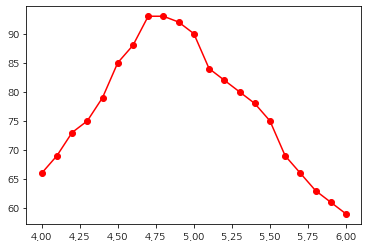

In [57]:
# 답
df["species2"]=df["species"]=="versicolor"

thresholds=np.linspace(4,6,21)
list_accuracy=[]
for t in thresholds:
    df["predict"]=df["petal length (cm)"]<=t
    accuracy=(df.predict==df.species2).sum()
    list_accuracy.append(accuracy)
    
plt.plot(thresholds,list_accuracy,"ro-")

In [64]:
list_accuracy[7]

93

In [65]:
thresholds[7]

4.7

### 와인 데이터
와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터이다. 
load_wine() 명령으로 로드하며 다음과 같이 구성되어 있다.

In [66]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [67]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


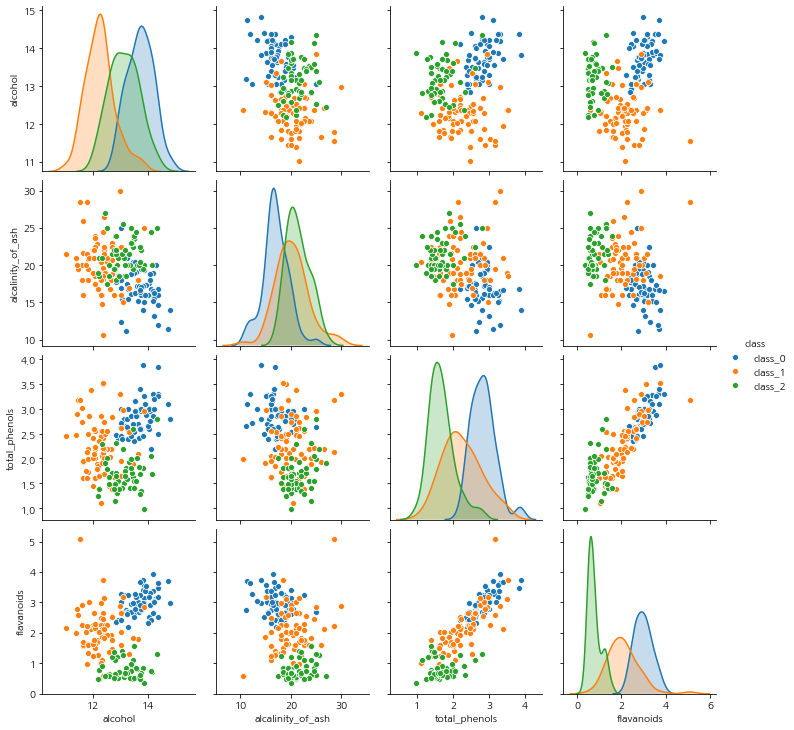

In [68]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

### 유방암 진단 데이터
load_breast_cancer 명령은 유방암(breast cancer) 진단 데이터를 제공한다. 
유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별한다.

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [70]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


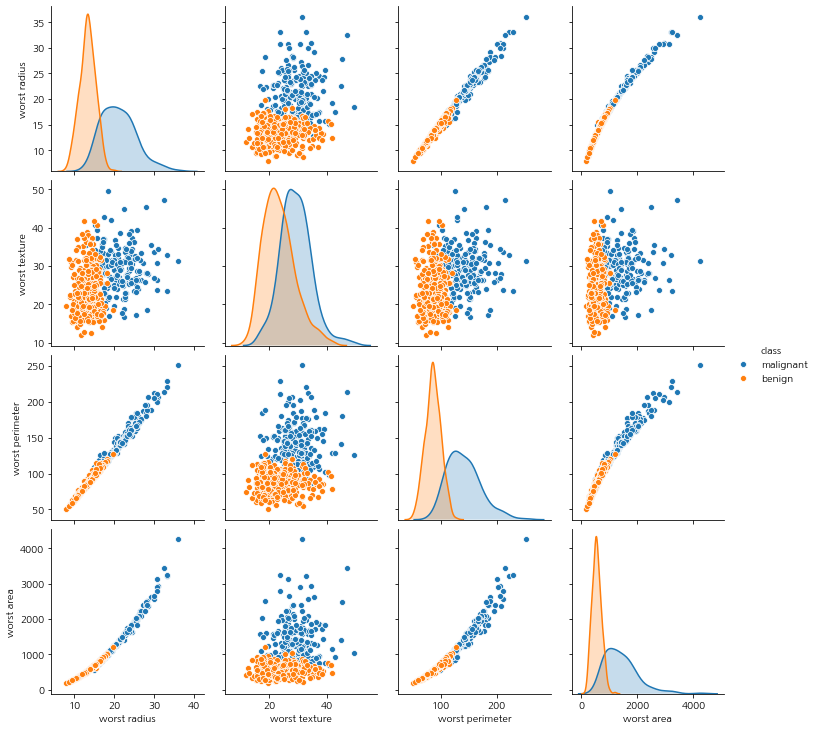

In [71]:
sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], 
             hue="class", data=df)
plt.show()

### 대표 수종 데이터
대표 수종 데이터는 미국 삼림을 30×30m 영역으로 나누어 각 영역의 특징으로부터 대표적인 나무의 종류(species of tree)을 예측하기위한 데이터이다. 
수종은 7종류이지만 특징 데이터가 54종류, 표본 데이터의 갯수가 581,012개에 달하는 대규모 데이터이다.

In [1]:
from sklearn.datasets import fetch_covtype

In [4]:
# 이거 너무 용량커서 안돌아감..
# covtype = fetch_covtype()
# print(covtype.DESCR)

### 로이터 말뭉치
```
로이터 말뭉치 데이터는 47,236개의 단어(vocalbulary)로 이루어진 804,414개의 문서를 
103개의 클래스로 분류하기 위한 텍스트 데이터이다. 
TF-IDF 인코딩된 특징 데이터 행렬을 제공한다.
```

In [5]:
from sklearn.datasets import fetch_rcv1

In [7]:
# 이것도 안돌아감
# rcv = fetch_rcv1()
# print(rcv.DESCR)

### 숫자 필기 이미지 데이터
```
0부터 9까지의 숫자를 손으로 쓴 이미지 데이터. load_digits() 명령으로 로드한다. 
각 이미지는 0부터 15까지의 명암을 가지는 8x8=64픽셀 해상도의 흑백 이미지이다.
```

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

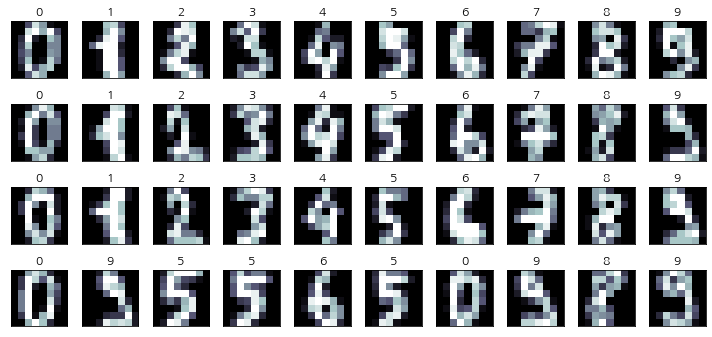

In [11]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

### 5.2 분류용 가상 데이터 생성
```
Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 여러가지 가상 데이터를 생성하는 함수를 제공한다.
```

```
make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.
```

In [12]:
# 분류문제에서는 대부분의 경우 다중공선성이 문제가 되지 않음

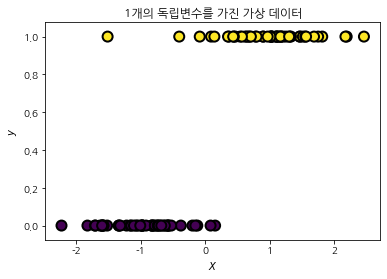

In [14]:
from sklearn.datasets import make_classification
# 1개의 독립변수를 가지고 2개의 클래스를 가지는 데이터를 생성한 예이다.
plt.title("1개의 독립변수를 가진 가상 데이터")
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

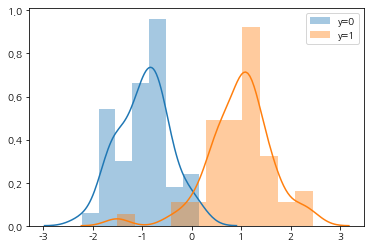

In [15]:
# 0근처로 기준값을 잡으면 분류가 잘 될것으로 예상됨!
sns.distplot(X[y == 0], label="y=0")
sns.distplot(X[y == 1], label="y=1")
plt.legend()
plt.show()

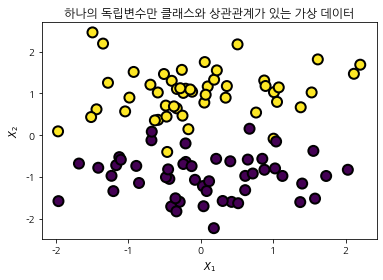

In [16]:
plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()
# X2가 영양가 있어보임

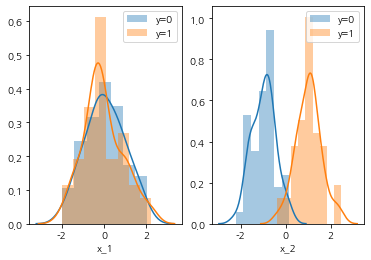

In [17]:
# X1으로 보면 뭐가뭔지 구분하기 어렵
# X2는 구분이 가능해짐
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

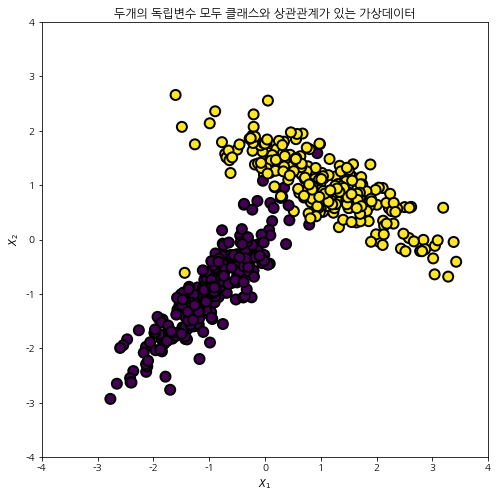

In [18]:
plt.figure(figsize=(8, 8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

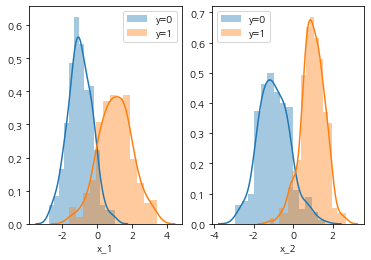

In [19]:
# X1혹은 X2 하나로만 분류하려고 하면  
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

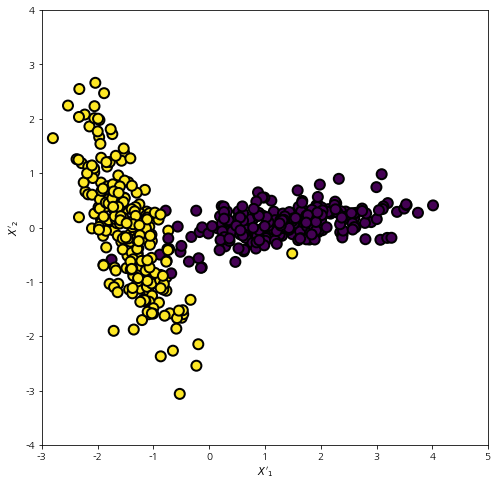

In [20]:
# 회전시킨것
l, V = np.linalg.eig(X.T @ X)
X2 = -X @ V

plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X'_1$")
plt.ylabel("$X'_2$")
plt.xlim(-3, 5)
plt.ylim(-4, 4)
plt.show()

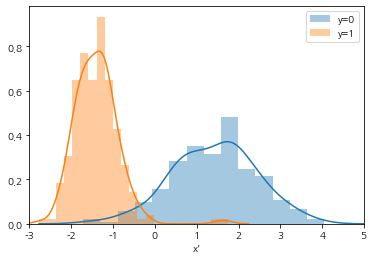

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

sns.distplot(X_pca[y == 0], label="y=0")
sns.distplot(X_pca[y == 1], label="y=1")
plt.legend()
plt.xlabel("x'")
plt.xlim(-3, 5)
plt.show()

각 클래스별 데이터의 갯수 - 0 클래스 : 90, 1 클래스 : 10


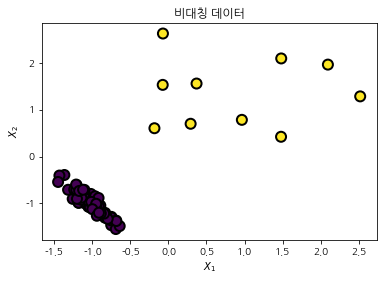

In [23]:
# weights를 사용
# 까맘게 90%로 데이터 생성됨
plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)
print("각 클래스별 데이터의 갯수 - {} 클래스 : {}, {} 클래스 : {}".format(val[0], cnt[0], val[1], cnt[1]))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

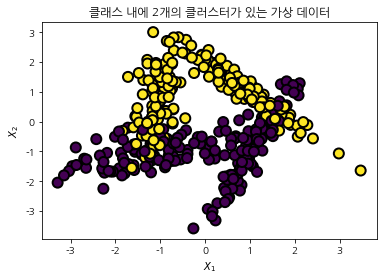

In [24]:
# n_clusters_per_class=2
# 같은 클래스내에서 두 뭉텅이가 나옴`
plt.title("클래스 내에 2개의 클러스터가 있는 가상 데이터")
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=2, random_state=0)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()


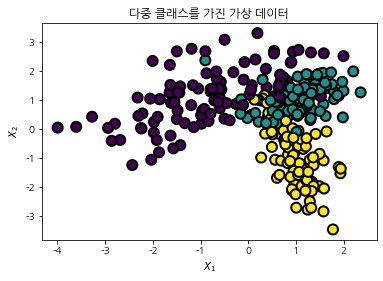

In [25]:
plt.title("다중 클래스를 가진 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

#### make_blobs
make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 
이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 
다음 데이터 생성 코드의 결과를 보면 make_classification 함수로 만든 가상데이터와 모양이 다른 것을 확인 할 수 있다. 
make_blobs는 보통 클러스링 용 가상데이터를 생성하는데 사용한다.

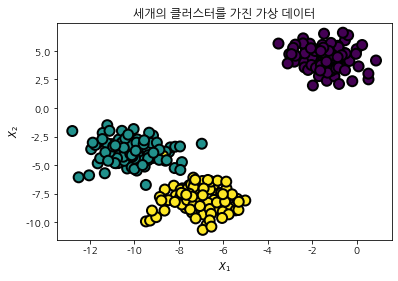

In [26]:
from sklearn.datasets import make_blobs

plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

#### make_moons
make_moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. 
make_moons 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

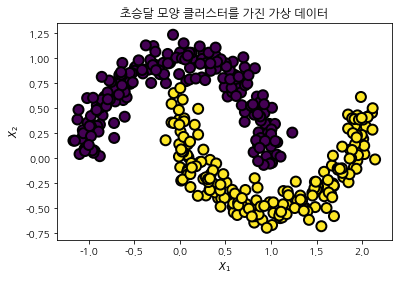

In [27]:
from sklearn.datasets import make_moons

plt.title("초승달 모양 클러스터를 가진 가상 데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

#### make_gaussian_quantiles
```
make_gaussian_quantiles 함수는 다차원 가우시안 분포의 표본을 생성하고 분포의 기대값을 중심으로 한 등고선으로 클래스를 분리한다. 
함수의 인수와 반환값은 다음과 같다. 
이 데이터는 '타원형 형태'의 닫힌 경계선으로만 분류할 수 있다.
```

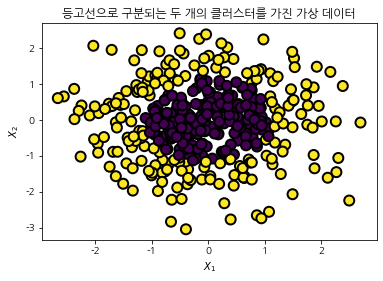

In [28]:
from sklearn.datasets import make_gaussian_quantiles

plt.title("등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터")
X, y = make_gaussian_quantiles(n_samples=400, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()